# Universal Approximation Theorem

Universal Approximation Theorem이란 1개의 비선형 Activation함수를 포함하고 있는 히든 레이어를 가진 Neural Network를 이용해 어떠한 함수든 근사시킬 수 있다는 이론.

In [4]:
%pip install torch torchvision

  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 MB 26.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 42.6 MB/s eta 0:00:00
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
Using cached filelock-3.18.0-py3-none-any.whl (16 kB)
Using cached fsspec-2025.3.2-py3-none-any.whl (194 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"

In [7]:
def func(x):
    """
    근사시키려는 함수
    """
    return 7*np.sin(x)*np.cos(x)*(2*x**2+5*x**3+x**2)*np.tan(x)+120 

In [8]:
x = np.linspace(-10, 10, 100)
y = func(x)

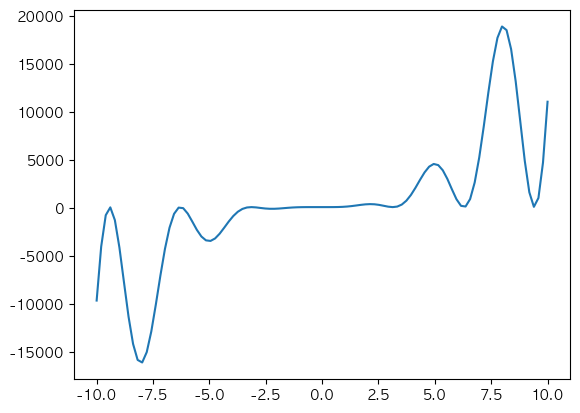

In [9]:
plt.plot(x, y)
plt.show()

In [10]:
X_train = torch.tensor(x, dtype=torch.float32).unsqueeze(dim=1).to(device)
y_train = torch.tensor(y, dtype=torch.float32).unsqueeze(dim=1).to(device)

X_train.shape, y_train.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [20]:
# 모델
model = nn.Sequential(
    nn.Linear(1, 10000),
    # nn.ReLU(),
    nn.Sigmoid(),   # logistic 함수
    nn.Linear(10000, 1)
).to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)

In [21]:
# 학습
model.train()                       # 학습을 위해 train 모드로 변환
for epoch in range(5000):
    # 추론
    pred = model(X_train)
    # 오차
    loss = loss_fn(pred, y_train)
    # grandient
    loss.backward()
    # 파라미터 업데이트
    optimizer.step()
    # 파라미터 초기화
    optimizer.zero_grad()
print("완료")

완료


In [22]:
y_pred = model(X_train)

In [23]:
y_pred.shape


torch.Size([100, 1])

In [24]:
# y_pred값을 ndarray로 변환
## 1. device를 cpu로 이동.
## 2. grad_fn 있는 경우 제거.
y_pred_array = y_pred.to("cpu").detach().numpy().flatten()

In [25]:
y_pred_array.shape

# flatten을 통해 차원 축소

(100,)

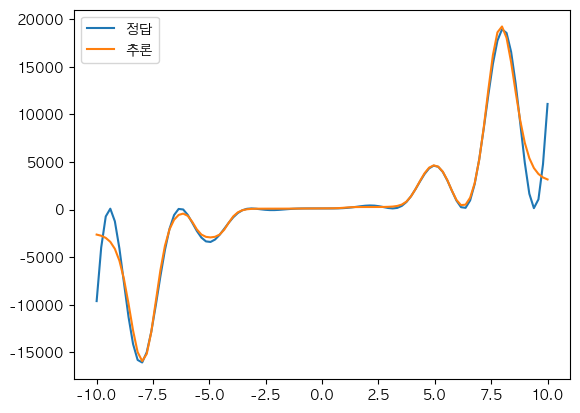

In [26]:
plt.plot(x, y, label="정답")
plt.plot(x, y_pred_array, label="추론")
plt.legend()
plt.show()